In [1]:
from collections import Counter
from ms3 import Parse
from ms3.utils import fifths2iv, fifths2sd
import pandas as pd
import plotly.express as px
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

# Loading data

In [13]:
p = Parse('~/couperin_concerts')
p.parse_tsv()
p

358 files.
KEY       -> EXTENSIONS
-----------------------
MS3       -> {'.mscx': 91}
.         -> {'.tsv': 1}
harmonies -> {'.tsv': 84}
notes     -> {'.tsv': 91}
measures  -> {'.tsv': 91}

None of the 91 score files have been parsed.

All 267 tabular files have been parsed, 84 of them as Annotations object(s).
KEY       -> ANNOTATION LAYERS
------------------------------
harmonies -> staff  voice  label_type  color  
          -> 1      1      0 (dcml)    default    (8416)

In [14]:
df = p.get_labels().droplevel(0)
df.head(20)

mc  mn mc_onset mn_onset timesig  staff  voice label  \
fnames                                                                      
c08n05_air_leger 0    1   0        0      1/4     3/8      1      1   G.I   
                 1    2   1      1/8      1/8     3/8      1      1    I6   
                 2    2   1      1/4      1/4     3/8      1      1     V   
                 3    3   2        0        0     3/8      1      1     I   
                 4    4   3        0        0     3/8      1      1   V65   
                 5    5   4        0        0     3/8      1      1     I   
                 6    6   5        0        0     3/8      1      1     I   
                 7    6   5      1/4      1/4     3/8      1      1  IM65   
                 8    7   6        0        0     3/8      1      1    IV   
                 9    7   6      1/4      1/4     3/8      1      1   ii7   
                 10   8   7        0        0     3/8      1      1    I6   
                 11   8   7      1/4      1/4     3/8      1      1     I   
                 12   9   8        0        0     3/8      1      1   V\\   
                 13  10   8        0      1/4     3/8      1      1   V.I   
                 14  11   9        0        0     3/8      1      1   V65   
                 15  12  10        0        0     3/8      1      1     I   
                 16  13  11        0        0     3/8      1      1   V65   
                 17  14  12        0        0     3/8      1      1     I   
                 18  14  12      1/4      1/4     3/8      1      1    I6   
                 19  15  13        0        0     3/8      1      1  ii65   

                    globalkey localkey pedal chord numeral form figbass  \
fnames                                                                    
c08n05_air_leger 0          G        I   NaN     I       I  NaN     NaN   
                 1          G        I   NaN    I6       I  NaN       6   
                 2          G        I   NaN     V       V  NaN     NaN   
                 3          G        I   NaN     I       I  NaN     NaN   
                 4          G        I   NaN   V65       V  NaN      65   
                 5          G        I   NaN     I       I  NaN     NaN   
                 6          G        I   NaN     I       I  NaN     NaN   
                 7          G        I   NaN  IM65       I    M      65   
                 8          G        I   NaN    IV      IV  NaN     NaN   
                 9          G        I   NaN   ii7      ii  NaN       7   
                 10         G        I   NaN    I6       I  NaN       6   
                 11         G        I   NaN     I       I  NaN     NaN   
                 12         G        I   NaN     V       V  NaN     NaN   
                 13         G        V   NaN     I       I  NaN     NaN   
                 14         G        V   NaN   V65       V  NaN      65   
                 15         G        V   NaN     I       I  NaN     NaN   
                 16         G        V   NaN   V65       V  NaN      65   
                 17         G        V   NaN     I       I  NaN     NaN   
                 18         G        V   NaN    I6       I  NaN       6   
                 19         G        V   NaN  ii65      ii  NaN      65   

                    changes relativeroot cadence phraseend chord_type  \
fnames                                                                  
c08n05_air_leger 0      NaN          NaN     NaN       NaN          M   
                 1      NaN          NaN     NaN       NaN          M   
                 2      NaN          NaN     NaN       NaN          M   
                 3      NaN          NaN     NaN       NaN          M   
                 4      NaN          NaN     NaN       NaN        Mm7   
                 5      NaN          NaN     NaN       NaN          M   
                 6      NaN          NaN     NaN       NaN          M   
                 7

N = 8406


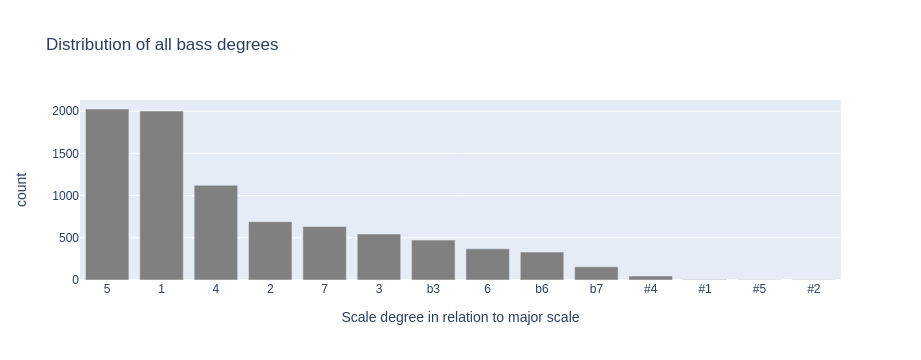

In [39]:
bd = df.bass_note.value_counts()
print(f"N = {len(df)}")
fig = px.bar(x=fifths2sd(bd.index.to_list()), y=bd.values, 
             labels=dict(x='Scale degree in relation to major scale', y='count'),
             title="Distribution of all bass degrees",
             color_discrete_sequence =['grey']*len(bd_min))
fig.update_xaxes(type='category')
fig.show()

N = 4187


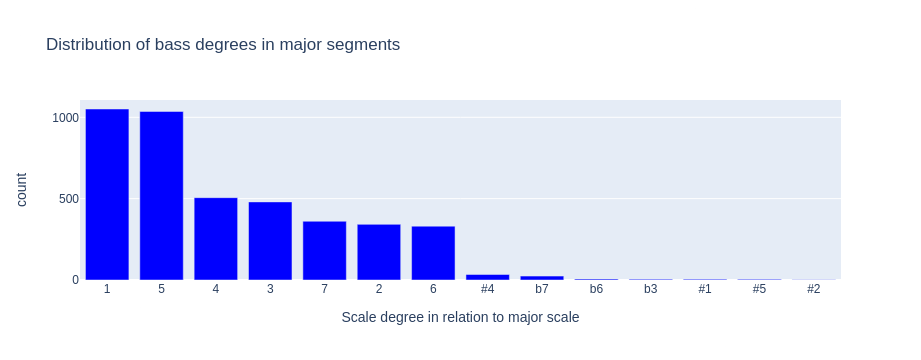

In [38]:
localkey_is_major = ~df.localkey_is_minor
print(f"N = {localkey_is_major.sum()}")
bd_maj = df[localkey_is_major].bass_note.value_counts()
fig = px.bar(bd_maj, x=fifths2sd(bd_maj.index.to_list(), minor=False), y=bd_maj.values, 
             labels=dict(x='Scale degree in relation to major scale', y='count'), 
             title="Distribution of bass degrees in major segments",
             color_discrete_sequence =['blue']*len(bd_maj))
fig.update_xaxes(type='category')
fig.show()

N = 4219


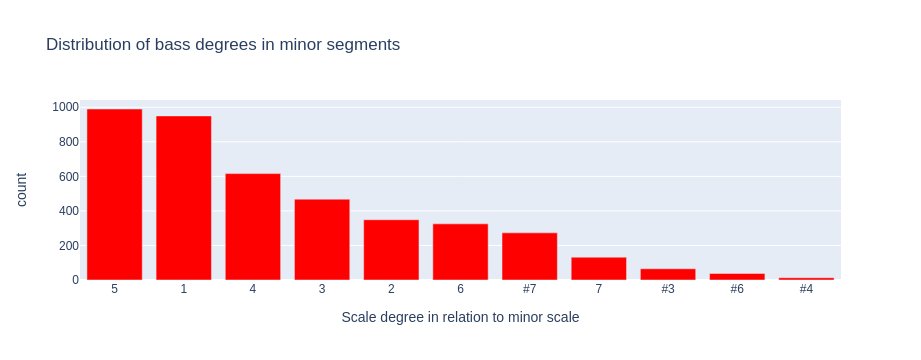

In [35]:
print(f"N = {df.localkey_is_minor.sum()}")
bd_min = df[df.localkey_is_minor].bass_note.value_counts()
fig = px.bar(bd_min, x=fifths2sd(bd_min.index.to_list(), minor=True), y=bd_min.values, 
             labels=dict(x='Scale degree in relation to minor scale', y='count'), 
             title="Distribution of bass degrees in minor segments",
             color_discrete_sequence =['red']*len(bd_min))
fig.update_xaxes(type='category')
fig.show()

## Correction of obvious mistakes (Aug 7th)

**5 occurrences of `bb3`**

Corrected by replacing incorrect `vi` (in minor) by `#vi` in `c08n02_ritournele` mm. 11, 17, 43, 51 and `c08n10_air_lentement` m. 38. In the first four mentioned cases, each subsequent `vii` needed correction to `#vii`, too, which could hint at a systematic error in minor segments. If the 'normal' `2` is written as `viio6` instead of `#viio6`, the bass degree will turn out wrongly as `b2`.

**11 remaining occurrences of `b2`**

As suspected above, `vii` had to replaced by `#vii` in:

* `c03n03_courante`, m. 7
* `c07n03_sarabande`, m. 30
* `c10n03_plainte`, m. 24
* `c11n01_majestueusement`, m. 36
* `c11n02_allemande`, m. 21
* `c11n03_seconde_allemande`, m. 15
* `c14n01_gravement`, m. 6
* `c14n04_fuguete`, m. 38
* `parnasse_07`, m. 44 (and in m. 39 `vi/iv` was corrected to `#vi/iv`)

Here, `vii` was actually `ii`:

* `c03n02_allemande`, m. 8

**7 occurrences of `b4`**

Once more, the reason are `viio` chords in minor contexts.

* `c01n06_menuet_en_trio`, m. 4
* `c05n05_musete`, m. 38
* `c07n04_fuguete`, mm. 11 & 16
* `c07n06_siciliene`, m. 16

Here, `bII` was written as minor triad `bii`:

* `c10n01_gravement`, m. 12

**2 occurrences of `b1`**

Another two cases where `vi` was actually `#vi` in minor.

* `c07n03_sarabande`, m. 32
* `c14n01_gravement`, m. 9

**2 occurrences of `b5`**

* `c03n03_courante`, m. 1: `VI2` => `VIM2` in minor
* `c08n10_air_lentement`, m. 37: `vi` => `#vi` in minor

**1 occurrence of `bb7`**

`parnasse_07`, m. 16 had `vii/iv` instead of `#vii/iv`.

In [16]:
df[df.bass_note==-6]

,,mc,mn,mc_onset,mn_onset,timesig,staff,voice,label,globalkey,localkey,pedal,chord,numeral,form,figbass,changes,relativeroot,cadence,phraseend,chord_type,globalkey_is_minor,localkey_is_minor,chord_tones,added_tones,root,bass_note,label_type,alt_label
fnames,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# Intervals between bass notes
## Get localkey segments

In [17]:
df['key_regions'] = df.groupby(level=0).localkey.apply(lambda col: col != col.shift()).cumsum()

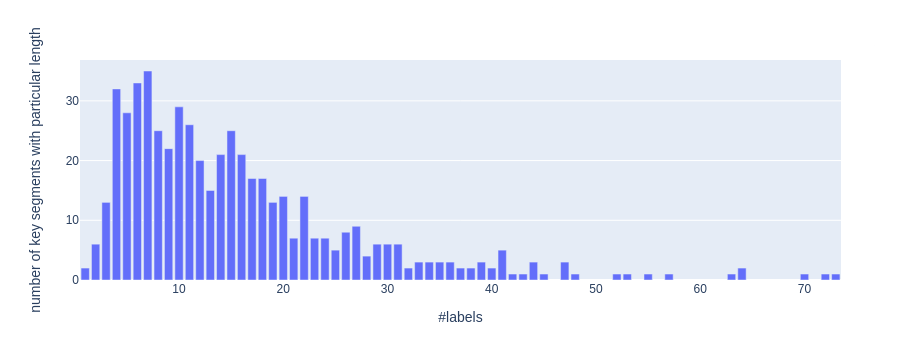

In [18]:
segment_lengths = df.groupby('key_regions').size()
segment_lengths_aggr = segment_lengths.value_counts()
px.bar(x=segment_lengths_aggr.index, y=segment_lengths_aggr, labels=dict(x='#labels', y='number of key segments with particular length'))

In [19]:
# Show all segments of length L
L = 1
selected = segment_lengths[segment_lengths == L].index
df[df.key_regions.isin(selected)]

,,mc,mn,mc_onset,mn_onset,timesig,staff,voice,label,globalkey,localkey,pedal,chord,numeral,form,figbass,changes,relativeroot,cadence,phraseend,chord_type,globalkey_is_minor,localkey_is_minor,chord_tones,added_tones,root,bass_note,label_type,alt_label,key_regions
fnames,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
c08n08_sarabande,62,26,24,0,0,3/4,1,1,I\\,G,v,NaN,I,I,NaN,NaN,NaN,NaN,NaN,\\,M,False,True,"(0, 4, 1)",(),0,0,0 (dcml),NaN,50
parnasse_06,30,13,13,1/8,1/8,3/8,1,1,iii.i,D,iii,NaN,i,i,NaN,NaN,NaN,NaN,NaN,NaN,m,False,True,"(0, -3, 1)",(),0,0,0 (dcml),NaN,265


## Deleting @none labels
This creates progressions between the label before and after the `@none` label that might not actually be perceived as transitions!

In [20]:
print(f"Length before: {len(df.index)}")
is_none = df.chord == '@none'
print(f"There are {is_none.sum()} @none labels which we are going to delete.")
df.drop(df.index[is_none], inplace=True)
print(f"Length after: {len(df.index)}")

Length before: 8416
There are 10 @none labels which we are going to delete.
Length after: 8406


## Get bass degree progressions & intervals
All scale degrees and intervals expressed as perfect fifths. 0 = local tonic, -3 = m3 above, 4 = M3 above etc.

In [21]:
bd_series = {seg: bn for seg, bn in  df.groupby('key_regions').bass_note}
bd_intervals = {seg: bd - bd.shift() for seg, bd in bd_series.items()}
df['bass_interval'] = df.groupby('key_regions').bass_note.apply(lambda bd: bd - bd.shift())
print("Example output for the intervals of the first key segment:")
print(bd_intervals[1])
df.loc[df.key_regions==1, 'bass_interval']

Example output for the intervals of the first key segment:
fnames              
c08n05_air_leger  0     <NA>
                  1        4
                  2       -3
                  3       -1
                  4        5
                  5       -5
                  6        0
                  7        4
                  8       -5
                  9        3
                  10       2
                  11      -4
                  12       1
Name: bass_note, dtype: Int64


fnames              
c08n05_air_leger  0     <NA>
                  1        4
                  2       -3
                  3       -1
                  4        5
                  5       -5
                  6        0
                  7        4
                  8       -5
                  9        3
                  10       2
                  11      -4
                  12       1
Name: bass_interval, dtype: Int64

### Count bass intervals

In [22]:
interval_counter = Counter()
for S in bd_intervals.values():
    interval_counter.update(S.dropna())
interval_counter

Counter({4: 283,
         -3: 211,
         -1: 1430,
         5: 577,
         -5: 726,
         0: 963,
         3: 706,
         2: 824,
         -4: 537,
         1: 627,
         -2: 797,
         6: 54,
         10: 2,
         8: 47,
         -9: 3,
         7: 26,
         -7: 13,
         -8: 19,
         -6: 9,
         9: 11})

In [23]:
px.bar(x=interval_counter.keys(), y=interval_counter.values(), labels=dict(x='interval in fifths', y='count'), title='Orderd on the line of fifths')

TypeError: Set type is unordered

In [ ]:
iv_order = [-6, 1, 8, -11, -4, 3, 10, -9, -2, 5, 12, -7, 0, 7, -5, 2, 9, -10, -3, 4, 11, -8, -1, 6]
iv_counter = {fifths2iv(i, True): interval_counter[i] for i in iv_order if i in interval_counter}
px.bar(x=iv_counter.keys(), y=iv_counter.values(), labels=dict(x='interval', y='count'), title='Ordered by base interval')

In [ ]:
iv_order = [12, 10, -9, -6, -7, 8, -4, 5, 1, 3, -2, 0, -1, 2, -5, 4, -3, 6, 7, -8, 9] # do not occur: -11, -10, 11, 
iv_counter = {fifths2iv(i, True): interval_counter[i] for i in iv_order if i in interval_counter}
px.bar(x=iv_counter.keys(), y=iv_counter.values(), labels=dict(x='interval', y='count'), title='Ordered around the unison')

In [ ]:
px.bar(x=sorted(iv_counter.keys(), key=lambda k: iv_counter[k], reverse=True), y=sorted(iv_counter.values(), reverse=True), labels=dict(x='interval', y='count'), title='Descending frequency')